In [2]:
# basic import
import os
import re
from os.path import join
from tqdm import tqdm
import math
import ast
import random
import warnings


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import cv2
import openslide
from PIL import Image
import torch

# spatialdata import 
import geopandas as gpd
import anndata
import spatialdata as sd
import squidpy as sq
import scanpy as sc

C:\Users\hua01\AppData\Local\miniforge3\envs\spd\lib\site-packages\numba\core\decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [24]:
input_path = 'C:/Users/hua01/Desktop/cwc/SpatialMultimodal/spd_new/miso'
subfolders = sorted([f.path for f in os.scandir(input_path) if f.is_dir()])
LEAP_folders  = [x for x in subfolders if '.zarr' in x]

In [25]:
folder = LEAP_folders[11]
folder

'C:/Users/hua01/Desktop/cwc/SpatialMultimodal/spd_new/miso\\LEAP-008A_sdata.zarr'

In [26]:
sdata = sd.read_zarr(folder)
sdata

SpatialData object, with associated Zarr store: C:\Users\hua01\Desktop\cwc\SpatialMultimodal\spd_new\miso\LEAP-008A_sdata.zarr
├── Images
│     └── 'hne': DataTree[cyx] (3, 10071, 11952), (3, 5035, 5976), (3, 2517, 2988), (3, 1258, 1494)
├── Shapes
│     ├── 'spots': GeoDataFrame shape: (2118, 2) (2D shapes)
│     └── 'spots_tf': GeoDataFrame shape: (2118, 2) (2D shapes)
└── Tables
      └── 'adata': AnnData (2118, 6000)
with coordinate systems:
    ▸ 'global', with elements:
        hne (Images), spots (Shapes), spots_tf (Shapes)

In [27]:
adata = sdata['adata']
adata

AnnData object with n_obs × n_vars = 2118 × 6000
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', '_indices', '_scvi_batch', '_scvi_labels', 'SampleID', 'LeapID', 'LEAP_PatientID', 'Treatment', 'ARM', 'pCR', 'gBRCA_status', 'PatientID', 'leiden_pca', 'leiden_scvi', 'Adipocytes_c2l_Midlevel', 'Arterial-like_EC_c2l_Midlevel', 'B_cell_c2l_Midlevel', 'CCR7_DC_c2l_Midlevel', 'CD4_Tfh-like_c2l_Midlevel', 'CD4_Treg_c2l_Midlevel', 'CD8_T_c2l_Midlevel', 'CD8_Texh_c2l_Midlevel', 'Cancer Epithelial_c2l_Midlevel', 'Capilary-like_EC_c2l_Midlevel', 'DC1_c2l_Midlevel', 'DC2_c2l_Midlevel', 'EC_angiogenic_c2l_Midlevel', 'Follicular_DC_c2l_Midlevel', 'GC_B_cell_c2l_Midlevel', 'LASP_c2l_Midlevel', 'LHS_c2l_Midlevel', 'Lymphatic_EC_c2l_Midlevel', 'Mac_C3_c2l_Midlevel', 'Mac_CCL18_c2l_Midlevel', 'Mac_CD36_c2l_Midlevel', 'Mac_COL27A1_c2l_Midlevel', 'Mac_LYVE1_c2l_Midlevel', 'Mac_SPP1_c2l_Midle

# UMAP

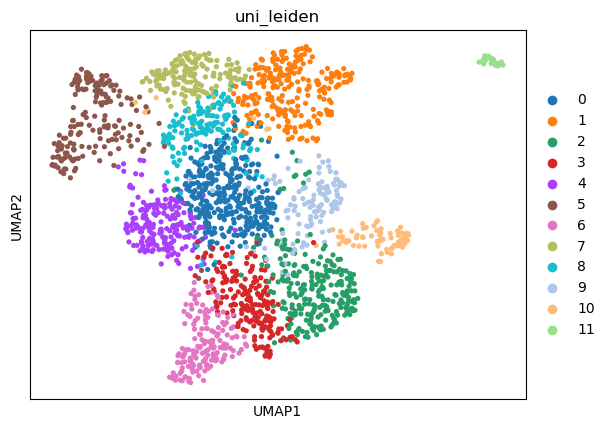

In [55]:
sc.pp.neighbors(adata, use_rep="uni_emb", key_added='uni')
sc.tl.leiden(adata, neighbors_key='uni', key_added="uni_leiden")

In [95]:
import spatialdata_plot as sdp

In [96]:
plt.figure()
sdata.pl.render_images().pl.render_shapes(color="uni_leiden").pl.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.028037382..1.0046729].
C:\Users\hua01\AppData\Local\miniforge3\envs\spd\lib\site-packages\spatialdata_plot\pl\utils.py:778: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


WARNING  The vector part of the transformation matrix is not isotropic, the radius will be scaled by the average of
         the modules of eigenvalues of the affine transformation matrix.                                           
         matrix=[[ 4.60037371e+00  2.85503958e-03 -2.66891442e+02]                                                 
          [-8.30352107e-03 -4.58936018e+00  1.17973932e+04]                                                        
          [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]                                                       
         eigenvalues=[ 4.60037113 -4.5893576 ]                                                                     
         scale_factor=4.594864364143339                                                                            
WARNING  The vector part of the transformation matrix is not isotropic, the radius will be scaled by the average of
         the modules of eigenvalues of the affine transformation matrix.

In [49]:
sc.tl.umap(adata, neighbors_key='uni')
sc.pl.umap(adata, color='uni_leiden')

dict_keys(['LEAP_PatientID_colors', 'LeapID_colors', 'SampleID_colors', 'Treatment_colors', '_scvi_manager_uuid', '_scvi_uuid', 'c2l_Midlevel', 'hvg', 'leiden', 'leiden_stamp_colors', 'log1p', 'mod', 'mod_c2l_Midlevel', 'pCR_colors', 'pca', 'scvi', 'spatial', 'spatial_neighbors', 'spatialdata_attrs', 'stamp', 'umap', 'uni', 'uni_colors', 'miso'])

In [52]:
adata.obsp['miso_connectivities']

<2118x2118 sparse matrix of type '<class 'numpy.float32'>'
	with 39986 stored elements in Compressed Sparse Row format>

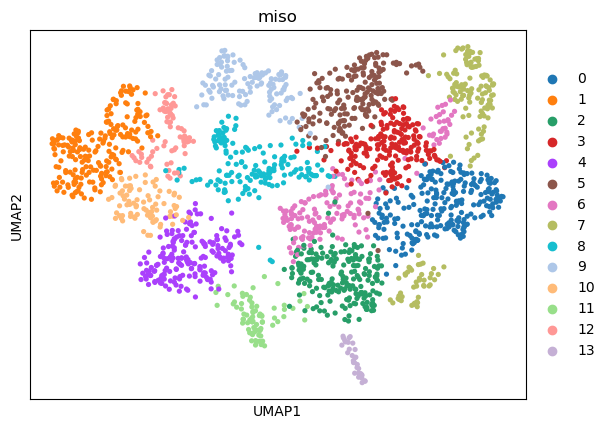

In [54]:
sc.pp.neighbors(adata, use_rep="hne_emb", key_added='miso')
sc.tl.leiden(adata, neighbors_key='miso', key_added="uni_leiden")
sc.tl.umap(adata, neighbors_key='miso')
sc.pl.umap(adata, color='uni_leiden')

In [57]:
adata.uns.keys()

dict_keys(['LEAP_PatientID_colors', 'LeapID_colors', 'SampleID_colors', 'Treatment_colors', '_scvi_manager_uuid', '_scvi_uuid', 'c2l_Midlevel', 'hvg', 'leiden', 'leiden_stamp_colors', 'log1p', 'mod', 'mod_c2l_Midlevel', 'pCR_colors', 'pca', 'scvi', 'spatial', 'spatial_neighbors', 'spatialdata_attrs', 'stamp', 'umap', 'uni', 'uni_colors', 'miso', 'uni_leiden', 'miso_colors', 'uni_leiden_colors'])

In [60]:
adata.obsm

AxisArrays with keys: X_pca, X_scVI, X_stamp, X_umap, X_umap_c2l_Midlevel, X_umap_pca, X_umap_scvi, _scvi_extra_categorical_covs, _scvi_extra_continuous_covs, hne_emb, means_cell_abundance_w_sf, q05_cell_abundance_w_sf, q05_cell_abundance_w_sf_c2l_Midlevel, q95_cell_abundance_w_sf, spatial, stds_cell_abundance_w_sf, uni_emb

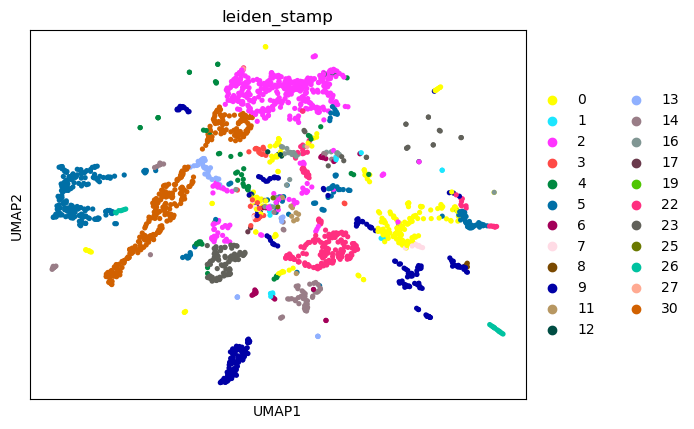

In [62]:
sc.tl.umap(adata, neighbors_key='stamp')
sc.pl.umap(adata, color='leiden_stamp')

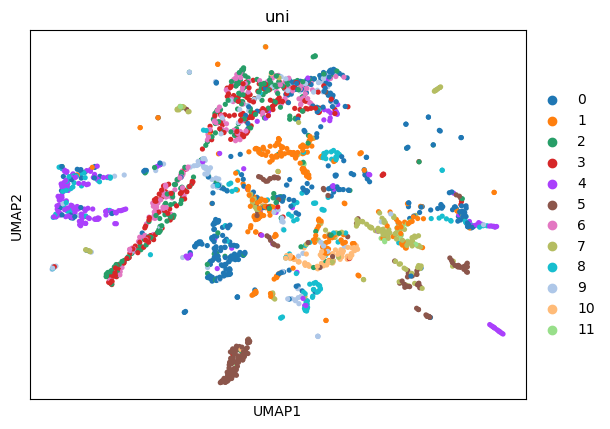

In [63]:
sc.pl.umap(adata, color='uni')

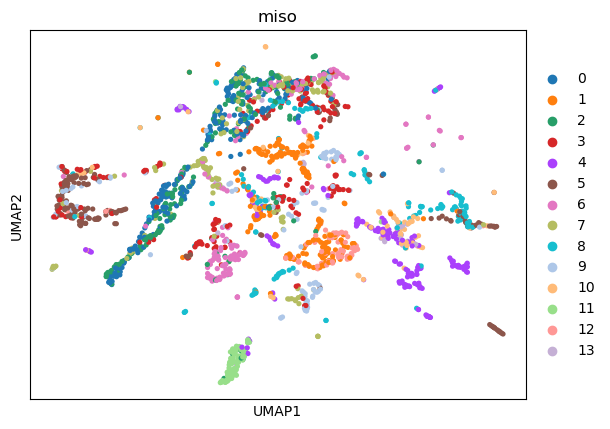

In [64]:
sc.pl.umap(adata, color='miso')

In [21]:
adata.obs.columns

Index(['in_tissue', 'array_row', 'array_col', 'n_genes', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score',
       'G2M_score', 'phase', '_indices', '_scvi_batch', '_scvi_labels',
       'SampleID', 'LeapID', 'LEAP_PatientID', 'Treatment', 'ARM', 'pCR',
       'gBRCA_status', 'PatientID', 'leiden_pca', 'leiden_scvi',
       'Adipocytes_c2l_Midlevel', 'Arterial-like_EC_c2l_Midlevel',
       'B_cell_c2l_Midlevel', 'CCR7_DC_c2l_Midlevel',
       'CD4_Tfh-like_c2l_Midlevel', 'CD4_Treg_c2l_Midlevel',
       'CD8_T_c2l_Midlevel', 'CD8_Texh_c2l_Midlevel',
       'Cancer Epithelial_c2l_Midlevel', 'Capilary-like_EC_c2l_Midlevel',
       'DC1_c2l_Midlevel', 'DC2_c2l_Midlevel', 'EC_angiogenic_c2l_Midlevel',
       'Follicular_DC_c2l_Midlevel', 'GC_B_cell_c2l_Midlevel',
       'LASP_c2l_Midlevel', 'LHS_c2l_Midlevel', 'Lymphatic_EC_c2l_Midlevel',
       'Mac_C3_c2l_Midlevel', 'Mac_CCL18_c2l_Midlevel',
       'Mac_CD36_c2l_Midlevel', 'Mac_COL27A1_c2l_Midlevel'

In [22]:
adata.obsm

AxisArrays with keys: X_pca, X_scVI, X_stamp, X_umap, X_umap_c2l_Midlevel, X_umap_pca, X_umap_scvi, _scvi_extra_categorical_covs, _scvi_extra_continuous_covs, hne_emb, means_cell_abundance_w_sf, q05_cell_abundance_w_sf, q05_cell_abundance_w_sf_c2l_Midlevel, q95_cell_abundance_w_sf, spatial, stds_cell_abundance_w_sf, uni_emb

In [67]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
# ari = adjusted_rand_score(labels1, labels2)
# nmi = normalized_mutual_info_score(labels1, labels2)

In [89]:
labels1 = adata.obs['leiden_stamp']
labels2 = adata.obs['uni']
normalized_mutual_info_score(labels1, labels2), adjusted_rand_score(labels1, labels2)

(0.4253617588249975, 0.2262770489835853)

In [90]:
labels1 = adata.obs['leiden_stamp']
labels2 = adata.obs['miso']
normalized_mutual_info_score(labels1, labels2), adjusted_rand_score(labels1, labels2)

(0.4721346019164241, 0.2672757130312431)

In [93]:
labels1 = adata.obs['miso']
labels2 = adata.obs['uni']
normalized_mutual_info_score(labels1, labels2), adjusted_rand_score(labels1, labels2)

(0.5334597381748805, 0.3726922562789311)

In [85]:
 adata.obs['leiden_stamp'].unique

['2', '22', '5', '30', '14', ..., '8', '27', '19', '25', '17']
Length: 23
Categories (23, object): ['0', '1', '2', '3', ..., '25', '26', '27', '30']

In [ ]:
sc.tl.leiden(adata, key_added="uni")

In [ ]:
sc.pl.umap()

In [14]:
adata.uns['stamp']['connectivities_key']

{'connectivities_key': 'stamp_connectivities',
 'distances_key': 'stamp_distances',
 'params': {'method': 'umap',
  'metric': 'euclidean',
  'n_neighbors': 15,
  'random_state': 0,
  'use_rep': 'X_stamp'}}

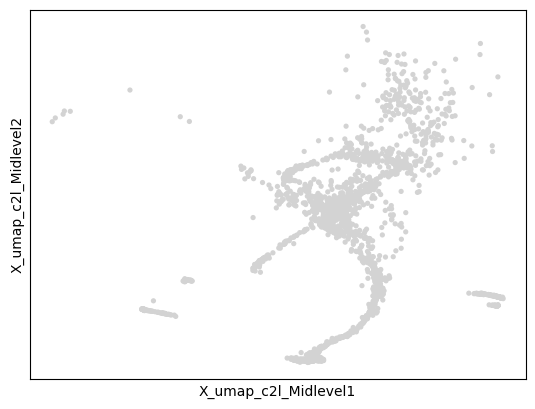

In [12]:
sc.pl.embedding(adata,basis='X_umap_c2l_Midlevel')

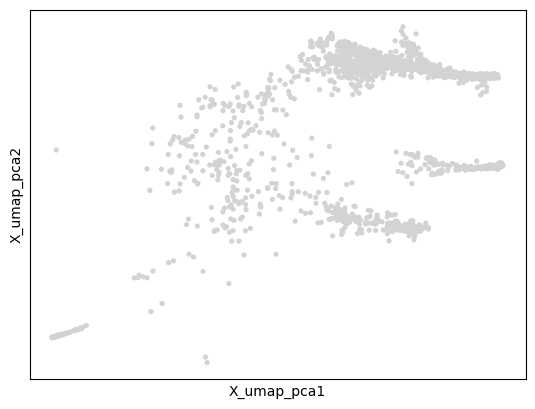

In [13]:
sc.pl.embedding(adata,basis='X_umap_pca')

In [10]:
adata2_ori = anndata.read_h5ad('C:/Users/hua01/Desktop/cwc/Registration/Results_new/LEAP-008A/LEAP-008A_Visium_v2.h5ad')

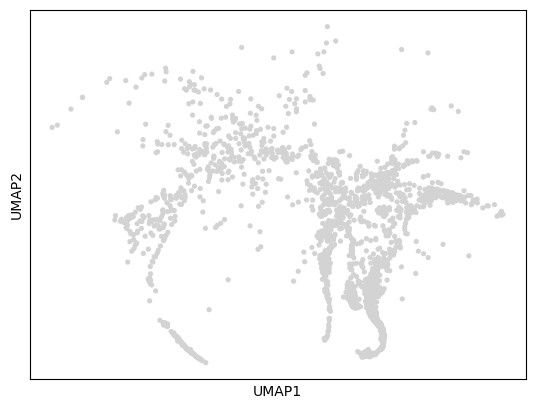

In [11]:
sc.pl.umap(adata2_ori)

# Check and compare

In [3]:
import seaborn as sns

from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import trustworthiness # For neighborhood preservation

# Plotting Style for Publication Quality
plt.style.use('seaborn-v0_8-whitegrid') # A good starting point
sns.set_context("paper", font_scale=1.2) # 'paper', 'notebook', 'talk', 'poster'
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

In [28]:
adata.obsm

AxisArrays with keys: X_pca, X_scVI, X_stamp, X_umap, X_umap_c2l_Midlevel, X_umap_pca, X_umap_scvi, _scvi_extra_categorical_covs, _scvi_extra_continuous_covs, hne_emb, means_cell_abundance_w_sf, miso_emb, q05_cell_abundance_w_sf, q05_cell_abundance_w_sf_c2l_Midlevel, q95_cell_abundance_w_sf, spatial, stds_cell_abundance_w_sf, uni_emb

In [30]:
adata.obs.columns

Index(['in_tissue', 'array_row', 'array_col', 'n_genes', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score',
       'G2M_score', 'phase', '_indices', '_scvi_batch', '_scvi_labels',
       'SampleID', 'LeapID', 'LEAP_PatientID', 'Treatment', 'ARM', 'pCR',
       'gBRCA_status', 'PatientID', 'leiden_pca', 'leiden_scvi',
       'Adipocytes_c2l_Midlevel', 'Arterial-like_EC_c2l_Midlevel',
       'B_cell_c2l_Midlevel', 'CCR7_DC_c2l_Midlevel',
       'CD4_Tfh-like_c2l_Midlevel', 'CD4_Treg_c2l_Midlevel',
       'CD8_T_c2l_Midlevel', 'CD8_Texh_c2l_Midlevel',
       'Cancer Epithelial_c2l_Midlevel', 'Capilary-like_EC_c2l_Midlevel',
       'DC1_c2l_Midlevel', 'DC2_c2l_Midlevel', 'EC_angiogenic_c2l_Midlevel',
       'Follicular_DC_c2l_Midlevel', 'GC_B_cell_c2l_Midlevel',
       'LASP_c2l_Midlevel', 'LHS_c2l_Midlevel', 'Lymphatic_EC_c2l_Midlevel',
       'Mac_C3_c2l_Midlevel', 'Mac_CCL18_c2l_Midlevel',
       'Mac_CD36_c2l_Midlevel', 'Mac_COL27A1_c2l_Midlevel'

In [39]:
# --- Helper function to generate embeddings (same as before, simplified) ---
def generate_embeddings(adata):
    embeddings_dict = {}
    sc.pp.neighbors(adata, use_rep="miso_emb", key_added='miso')
    sc.tl.leiden(adata, neighbors_key='miso', key_added='leiden_miso')
    sc.pp.neighbors(adata, use_rep="uni_emb", key_added='uni')
    sc.tl.leiden(adata, neighbors_key='uni', key_added='leiden_uni')
    sc.pp.neighbors(adata, use_rep="hne_emb", key_added='miso_hne')
    sc.tl.leiden(adata, neighbors_key='miso_hne', key_added='leiden_miso_hne')
    embeddings_dict['uni'] = (adata.obsm['uni_emb'], adata.obs['leiden_uni'])
    embeddings_dict['miso_hne'] = (adata.obsm['hne_emb'], adata.obs['leiden_miso_hne'])
    embeddings_dict['miso'] = (adata.obsm['miso_emb'], adata.obs['leiden_miso'])
    return embeddings_dict

# --- Evaluation functions (simplified versions from previous response) ---
def evaluate_dataset_embeddings(leap_id, embeddings, y_true):
    '''
        embeddings: dict
            emb_name
            emb_data
    '''
    results_list = []

    for emb_name, (emb_data, cluster_labels) in embeddings.items():
        sil_score = silhouette_score(emb_data, cluster_labels)
        ari_score = adjusted_rand_score(y_true, cluster_labels)
        nmi_score = normalized_mutual_info_score(y_true, cluster_labels)
        ari_with_miso_hne = None
        nmi_with_miso_hne = None
        ari_with_miso = None
        nmi_with_miso = None
        if emb_name == 'uni':
            leiden_miso_hne = embeddings['miso_hne'][1]
            leiden_miso = embeddings['miso'][1]
            ari_with_miso_hne = adjusted_rand_score(cluster_labels, leiden_miso_hne)
            nmi_with_miso_hne = normalized_mutual_info_score(cluster_labels, leiden_miso_hne)
            ari_with_miso = adjusted_rand_score(cluster_labels, leiden_miso)
            nmi_with_miso = normalized_mutual_info_score(cluster_labels, leiden_miso)
        elif emb_name == 'miso_hne':
            leiden_miso = embeddings['miso'][1]
            ari_with_miso = adjusted_rand_score(cluster_labels, leiden_miso)
            nmi_with_miso = normalized_mutual_info_score(cluster_labels, leiden_miso)

        results_list.append({
            "LEAP_ID": leap_id,
            "EmbeddingMethod": emb_name,
            "Silhouette": sil_score,
            "ARI_with_stamp": ari_score,
            "NMI_with_stamp": nmi_score,
            "ARI_with_miso_hne": ari_with_miso_hne,
            "NMI_with_miso_hne": nmi_with_miso,
            "ARI_with_miso": ari_with_miso,
            "NMI_with_miso": nmi_with_miso,
        })
    return pd.DataFrame(results_list)

In [42]:
error_msg = []
all_results_df = pd.DataFrame()
for folder in tqdm(LEAP_folders):
    try:
    # if True:
        leap_id = os.path.basename(folder)[:9]
        # print(leap_id)
        sdata = sd.read_zarr(folder)
        adata = sdata["adata"]
        y_true = adata.obs['leiden_stamp']
        embeddings = generate_embeddings(adata=adata)
        dataset_results_df = evaluate_dataset_embeddings(leap_id, embeddings, y_true)
        all_results_df = pd.concat([all_results_df, dataset_results_df], ignore_index=True)

    except Exception as e:
        # error_msg.append((leap_id, e))
        print((leap_id, e))
        continue

100%|██████████████████████████████████████████████████████████████████████████████████| 68/68 [46:09<00:00, 40.73s/it]


## Aggregate and Visualize Across Datasets

In [ ]:
# Load results if previously saved
# all_results_df = pd.read_csv("all_embedding_results.csv")

metrics_to_analyze = ["Silhouette", "ARI_with_stamp", "NMI_with_stamp", "ARI_with_miso_hne", "NMI_with_miso_hne", "ARI_with_miso", "NMI_with_miso"]

# --- 1. Average Performance (Bar Plots) ---
avg_performance = all_results_df.groupby("EmbeddingMethod")[metrics_to_analyze].mean().reset_index()
print("\n--- Average Performance Across Datasets ---")
print(avg_performance)

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
for i, metric in enumerate(metrics_to_analyze):
    sns.barplot(x="EmbeddingMethod", y=metric, data=avg_performance, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Average {metric}")
    axes[i].tick_params(axis='x', rotation=30, ha='right')
    axes[i].set_xlabel("")
plt.suptitle("Average Metric Scores Across All Datasets", fontsize=18, y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("average_performance_barchart.png", dpi=300, bbox_inches='tight')
plt.show()


# --- 2. Rank-Based Analysis ---
# For each dataset and metric, rank the methods. Higher scores are better rank (rank 1 is best).
# For metrics where lower is better (e.g., Davies-Bouldin), you'd invert the rank or rank -score.
# Our current metrics: higher is better.

all_results_df_ranked = all_results_df.copy()
for metric in metrics_to_analyze:
    # rankdata default is ascending, so use -score for 'higher is better'
    all_results_df_ranked[f'{metric}_Rank'] = all_results_df_ranked.groupby('Dataset')[metric].rank(method='average', ascending=False)

print("\n--- Results with Ranks ---")
print(all_results_df_ranked.to_string())

avg_ranks = all_results_df_ranked.groupby('EmbeddingMethod')[[f'{m}_Rank' for m in metrics_to_analyze]].mean().reset_index()
print("\n--- Average Ranks Across Datasets ---")
print(avg_ranks)

fig_ranks, axes_ranks = plt.subplots(2, 2, figsize=(15, 12))
axes_ranks = axes_ranks.flatten()
for i, metric in enumerate(metrics_to_analyze):
    sns.barplot(x="EmbeddingMethod", y=f"{metric}_Rank", data=avg_ranks, ax=axes_ranks[i], palette="mako")
    axes_ranks[i].set_title(f"Average Rank for {metric} (Lower is Better)")
    axes_ranks[i].tick_params(axis='x', rotation=30, ha='right')
    axes_ranks[i].set_xlabel("")
plt.suptitle("Average Method Ranks Across All Datasets", fontsize=18, y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("average_ranks_barchart.png", dpi=300, bbox_inches='tight')
plt.show()


# --- 3. Heatmaps of Performance (Scores or Ranks) ---
for metric in metrics_to_analyze:
    # Heatmap of Scores
    pivot_scores = all_results_df.pivot(index="Dataset", columns="EmbeddingMethod", values=metric)
    plt.figure(figsize=(8, max(4, 0.5 * len(datasets_for_eval)))) # Adjust height based on num datasets
    sns.heatmap(pivot_scores, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
    plt.title(f"Heatmap of {metric} Scores")
    plt.ylabel("Dataset")
    plt.xlabel("Embedding Method")
    plt.xticks(rotation=30, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f"heatmap_{metric}_scores.png", dpi=300, bbox_inches='tight')
    plt.show()

    # Heatmap of Ranks
    pivot_ranks = all_results_df_ranked.pivot(index="Dataset", columns="EmbeddingMethod", values=f"{metric}_Rank")
    plt.figure(figsize=(8, max(4, 0.5 * len(datasets_for_eval))))
    sns.heatmap(pivot_ranks, annot=True, fmt=".1f", cmap="YlGnBu_r", linewidths=.5) # _r reverses cmap, good for ranks
    plt.title(f"Heatmap of {metric} Ranks (Lower Rank is Better)")
    plt.ylabel("Dataset")
    plt.xlabel("Embedding Method")
    plt.xticks(rotation=30, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f"heatmap_{metric}_ranks.png", dpi=300, bbox_inches='tight')
    plt.show()


# --- 4. Boxplots/Violin Plots of Metric Distributions ---
for metric in metrics_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="EmbeddingMethod", y=metric, data=all_results_df, palette="pastel")
    plt.title(f"Distribution of {metric} Scores Across Datasets")
    plt.xticks(rotation=30, ha='right')
    plt.xlabel("Embedding Method")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.savefig(f"boxplot_{metric}_scores.png", dpi=300, bbox_inches='tight')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.violinplot(x="EmbeddingMethod", y=f"{metric}_Rank", data=all_results_df_ranked, palette="pastel", inner="quartile")
    plt.title(f"Distribution of {metric} Ranks Across Datasets (Lower is Better)")
    plt.xticks(rotation=30, ha='right')
    plt.xlabel("Embedding Method")
    plt.ylabel(f"{metric} Rank")
    plt.tight_layout()
    plt.savefig(f"violinplot_{metric}_ranks.png", dpi=300, bbox_inches='tight')
    plt.show()



In [ ]:
# --- 5. Radar Chart for Average Ranks (or Scores if normalized) ---
# Radar charts are good for visualizing multi-dimensional performance for each method.
# We'll use average ranks here.

from math import pi

categories = [f"{m}_Rank" for m in metrics_to_analyze]
N_cat = len(categories)
angles = [n / float(N_cat) * 2 * pi for n in range(N_cat)]
angles += angles[:1] # Close the circle

# Invert ranks so higher value on radar is better (optional, for visualization preference)
# Or, ensure all metrics are "higher is better" before ranking for radar
# For this example, we plot raw ranks (lower is better on radar, spikes towards center)
radar_data = avg_ranks.set_index("EmbeddingMethod")[categories]

fig_radar, ax_radar = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row_name in enumerate(radar_data.index):
    values = radar_data.loc[row_name].values.flatten().tolist()
    values += values[:1] # Close the circle
    ax_radar.plot(angles, values, linewidth=2, linestyle='solid', label=row_name, alpha=0.7)
    ax_radar.fill(angles, values, alpha=0.2)

ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels([m.replace("_Rank", "") for m in categories]) # Cleaned labels
ax_radar.set_yticks(np.arange(1, radar_data.max().max() + 1, 1)) # Adjust y-ticks based on rank range
ax_radar.set_yticklabels([f"{j}" for j in np.arange(1, radar_data.max().max() +1 , 1)])
plt.title("Average Method Ranks Radar Chart (Spikes Towards Center = Better)", size=16, y=1.1)
ax_radar.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig("radar_chart_avg_ranks.png", dpi=300, bbox_inches='tight')
plt.show()


# --- 6. Scatter plots comparing two methods on a metric ---
# Example: UMAP vs PCA on ARI
if "UMAP" in all_results_df["EmbeddingMethod"].unique() and "PCA" in all_results_df["EmbeddingMethod"].unique():
    metric_to_compare = "ARI"
    df_pca = all_results_df[all_results_df["EmbeddingMethod"] == "PCA"].set_index("Dataset")
    df_umap = all_results_df[all_results_df["EmbeddingMethod"] == "UMAP"].set_index("Dataset")

    # Merge to align by dataset
    comparison_df = pd.merge(df_pca[[metric_to_compare]], df_umap[[metric_to_compare]],
                             left_index=True, right_index=True, suffixes=('_PCA', '_UMAP'))

    plt.figure(figsize=(7, 7))
    sns.scatterplot(x=f"{metric_to_compare}_PCA", y=f"{metric_to_compare}_UMAP", data=comparison_df, hue=comparison_df.index, s=100, legend=True)
    min_val = comparison_df[[f"{metric_to_compare}_PCA", f"{metric_to_compare}_UMAP"]].min().min() - 0.05
    max_val = comparison_df[[f"{metric_to_compare}_PCA", f"{metric_to_compare}_UMAP"]].max().max() + 0.05
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label="y=x (Equal Performance)") # Diagonal line
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    plt.xlabel(f"PCA {metric_to_compare}")
    plt.ylabel(f"UMAP {metric_to_compare}")
    plt.title(f"Comparison of UMAP vs PCA on {metric_to_compare}")
    plt.legend(title="Dataset", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout(rect=[0,0,0.85,1]) # Adjust for legend
    plt.savefig("scatter_compare_umap_pca_ari.png", dpi=300, bbox_inches='tight')
    plt.show()

##  Relating Performance to Dataset Characteristics

In [ ]:
dataset_metadata = pd.DataFrame({
    "Dataset": ["Blobs_Clear", "Blobs_Overlap", "Classification_Std", "HighDim_LowN"],
    "N_Samples": [X1.shape[0], X2.shape[0], X3.shape[0], X4.shape[0]],
    "N_Features": [X1.shape[1], X2.shape[1], X3.shape[1], X4.shape[1]],
    "N_Classes": [len(np.unique(y1)), len(np.unique(y2)), len(np.unique(y3)), len(np.unique(y4))]
})

# Merge results with metadata
results_with_meta = pd.merge(all_results_df, dataset_metadata, on="Dataset")

# Plot, for example, kNN_Accuracy vs. N_Features for each method
metric_of_interest = "kNN_Accuracy"
char_of_interest = "N_Features" # or "N_Samples"

plt.figure(figsize=(10, 6))
sns.lmplot(x=char_of_interest, y=metric_of_interest, hue="EmbeddingMethod", data=results_with_meta, aspect=1.5, height=5)
# sns.scatterplot(x=char_of_interest, y=metric_of_interest, hue="EmbeddingMethod", size="N_Samples", data=results_with_meta, legend="brief")
plt.title(f"{metric_of_interest} vs. {char_of_interest}")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"performance_vs_{char_of_interest}.png", dpi=300, bbox_inches='tight')
plt.show()